#### ACCQ 203
# TP11 - Codes correcteurs d'erreurs algébriques

## Exo 167

In [1]:
C = codes.HammingCode(GF(2),3)
G = C.generator_matrix()
H = C.parity_check_matrix()
d = C.minimum_distance()

In [2]:
G

[1 0 0 0 0 1 1]
[0 1 0 0 1 0 1]
[0 0 1 0 1 1 0]
[0 0 0 1 1 1 1]

In [3]:
H

[1 0 1 0 1 0 1]
[0 1 1 0 0 1 1]
[0 0 0 1 1 1 1]

In [4]:
d

3

## Exo 168

In [34]:
def H(q,x):
    if x==0 :
        return 0
    l = lambda x : log(x,q)
    if 0<x and x<=(1-1/q) :
        return x*l(q-1)-x*l(x)-(1-x)*l(1-x)
    return 1

def BorneGV(q,x):
    return 1 - H(q,x)

def BorneP(q,x):
    th = 1 - 1/q
    if 0<=x and x<=th :
        return(1-x/th)
    return 0

def BorneH(q,x):
    return 1 - H(q,x/2)

def BorneMRRWW(q,x):
    th = 1 - 1/q
    if 0<=x and x<=th :
        return H(q,(q-1-(q-2)*x-2*sqrt((q-1)*x*(1-x)))/q)
    return 0

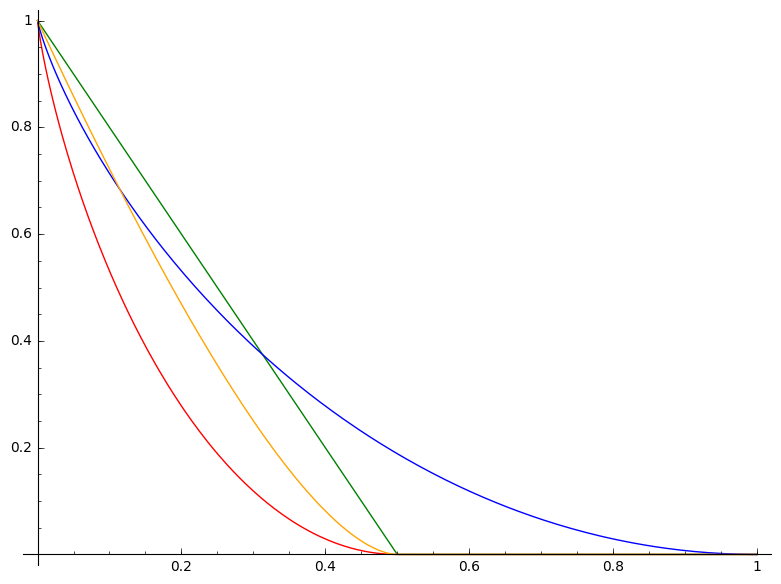

In [35]:
q = 2
plot((lambda x : BorneGV(q,x)),(0,1),color='red')\
+plot((lambda x : BorneP(q,x)),(0,1),color='green')\
+plot((lambda x : BorneH(q,x)),(0,1),color='blue')\
+plot((lambda x : BorneMRRWW(q,x)),(0,1),color='orange')

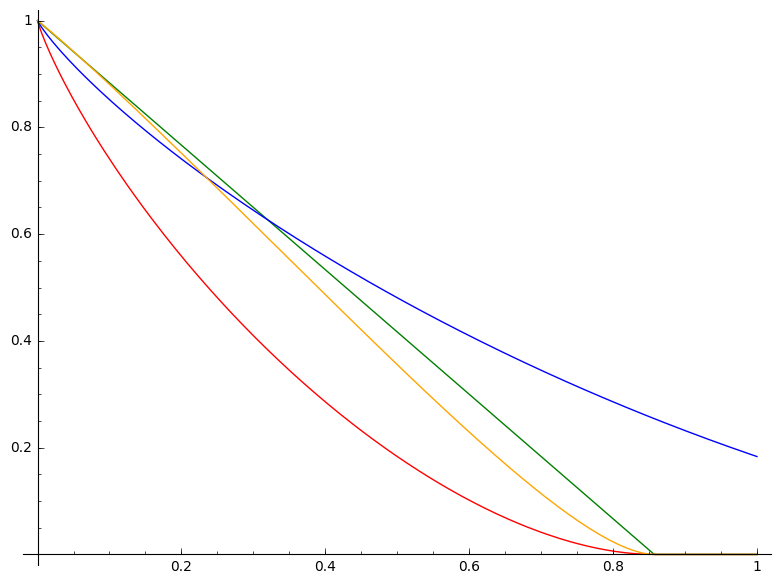

In [36]:
q = 7
plot((lambda x : BorneGV(q,x)),(0,1),color='red')\
+plot((lambda x : BorneP(q,x)),(0,1),color='green')\
+plot((lambda x : BorneH(q,x)),(0,1),color='blue')\
+plot((lambda x : BorneMRRWW(q,x)),(0,1),color='orange')

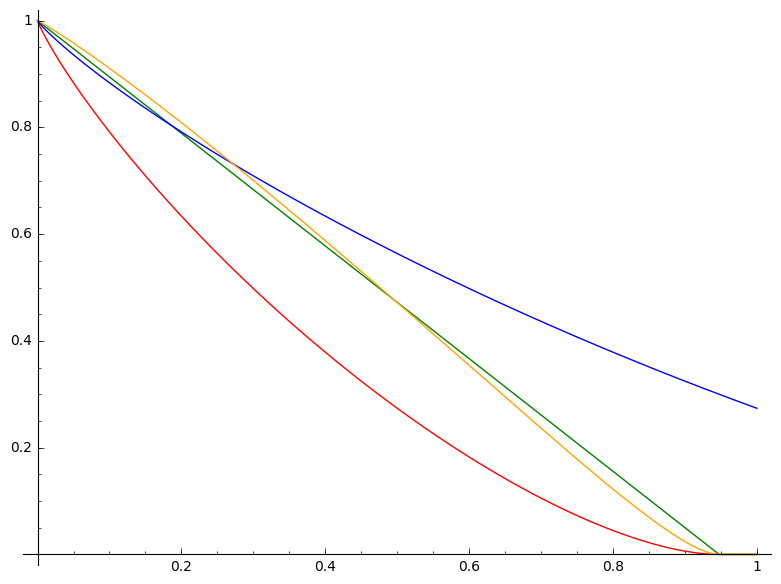

In [39]:
q = 19
plot((lambda x : BorneGV(q,x)),(0,1),color='red')\
+plot((lambda x : BorneP(q,x)),(0,1),color='green')\
+plot((lambda x : BorneH(q,x)),(0,1),color='blue')\
+plot((lambda x : BorneMRRWW(q,x)),(0,1),color='orange')

## Exo 169

In [10]:
Fq = FiniteField(13)
n = 12
k = 5
a = 11
G = matrix(Fq,[[z^j for z in [a^(-i) for i in range(n)]] for j in range(k)])
H = matrix(Fq,[[z^j for z in [a^(-i) for i in range(n)]] for j in range(1,n-k+1)])

In [11]:
G

[ 1  1  1  1  1  1  1  1  1  1  1  1]
[ 1  6 10  8  9  2 12  7  3  5  4 11]
[ 1 10  9 12  3  4  1 10  9 12  3  4]
[ 1  8 12  5  1  8 12  5  1  8 12  5]
[ 1  9  3  1  9  3  1  9  3  1  9  3]

In [12]:
H

[ 1  6 10  8  9  2 12  7  3  5  4 11]
[ 1 10  9 12  3  4  1 10  9 12  3  4]
[ 1  8 12  5  1  8 12  5  1  8 12  5]
[ 1  9  3  1  9  3  1  9  3  1  9  3]
[ 1  2  4  8  3  6 12 11  9  5 10  7]
[ 1 12  1 12  1 12  1 12  1 12  1 12]
[ 1  7 10  5  9 11 12  6  3  8  4  2]

In [13]:
r = vector(Fq,[5,2,9,9,1,11,7,5,7,4,3,1])
s = H*r
s

(3, 0, 10, 0, 3, 0, 10)

In [14]:
factor(berlekamp_massey(list(s[0:6])))

(x + 5) * (x + 8)

Les racines du polynome sont $5$ et $8$ qui correspondent à $\alpha^{-9}$ et $\alpha^{-3}$. Les erreurs se situent donc en position 3 et 9.

On ne connait pas ma valeur des erreurs, on ne peut donc pas conclure à l'aide de Berlekamp-Massey.

## Exo 171

**1.** $F(X,Y,Z) = Y^2Z + YZ^2 + X^3 + XZ^2 + Z^3$

**2.** Si $f$ se factorise, alors $f(x,y) = (y-t_1(x))(y-t_2(x))$ avec $t_1+t_2 = 1$ et $t_1t_2$ de degré 3, ce qui est impossible. Donc $\mathcal{E}$ est irréductible.

On a $\frac{\partial F}{\partial X} = X^2+Z^2$, $\frac{\partial F}{\partial Y} = Z^2$ et $\frac{\partial F}{\partial Z} = Y^2$, qui ne s'annulent pas simultanément sur $\mathcal{E}(\overline{\mathbb{F}_2})$. Donc $\mathcal{E}$ est lisse.

On a $g=1$ à l'aide de la formule de Plücker.

**3.** Sur $\mathbb{F_2}$, le seul point est $(0:1:0)$ 
